#1. Choose Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',11)

In [ ]:
webtoon_df = pd.read_csv("/gdrive/MyDrive/BigDataStudy/Webtoon Dataset.csv")

print(webtoon_df)

      id                      Name                      Writer     Likes  \
0      0                Let's Play  Leeanne M. Krecic (Mongie)     30.6M   
1      1               True Beauty                     Yaongyi     39.9M   
2      2       Midnight Poppy Land                    Lilydusk     10.4M   
3      3               Age Matters                 Enjelicious     25.9M   
4      4              Unholy Blood    Lina Im / Jeonghyeon Kim      9.9M   
..   ...                       ...                         ...       ...   
564  564       Third Shift Society           Meredith Moriarty  8,66,428   
565  565                Adamsville              Michael Regina  1,84,981   
566  566               WEBTOON Now      LOZOLZ / Wyatt the Cat      1.9M   
567  567  Staying Healthy Together             Various Artists      1.5M   
568  568        ã„´ã…‡ã„¹ã…‡ã„´ã„¹                      LOZOLZ  2,65,458   

            Genre  Rating Subscribers  \
0         Romance    9.62        4.2M   
1    

In [ ]:
webtoon_df.head() # check data using head

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [ ]:
webtoon_df.tail() # check data using tail 

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
564,564,Third Shift Society,Meredith Moriarty,"8,66,428",Supernatural,9.78,376.9K,"Life's funny. One minute you're jobless, deep ...",UP EVERY FRIDAY,https://www.webtoons.com/en/supernatural/third...
565,565,Adamsville,Michael Regina,"1,84,981",Mystery,9.32,60.4K,"""Adamsville"" is an all ages series about two m...",COMPLETED,https://www.webtoons.com/en/mystery/adamsville...
566,566,WEBTOON Now,LOZOLZ / Wyatt the Cat,1.9M,Informative,9.25,459.2K,Get your WEBTOON news here!,UP EVERY MONDAY,https://www.webtoons.com/en/tiptoon/webtoon-no...
567,567,Staying Healthy Together,Various Artists,1.5M,Informative,9.76,204.6K,A series of tips for staying safe during the C...,COMPLETED,https://www.webtoons.com/en/tiptoon/staying-he...
568,568,ã„´ã…‡ã„¹ã…‡ã„´ã„¹,LOZOLZ,"2,65,458",Informative,8.83,109.1K,The mysterious team that brings Webtoon to you...,COMPLETED,https://www.webtoons.com/en/tiptoon/lozolz/lis...


#2. Data Preprocessing

In [ ]:
webtoon_df.info()  # check null and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB


In [ ]:
webtoon_df.describe() # 수치값 가지는 column이 두개 

,id,Rating
count,569.000000,569.000000
mean,284.000000,9.418998
std,164.400426,0.557571
min,0.000000,5.410000
25%,142.000000,9.310000
50%,284.000000,9.580000
75%,426.000000,9.730000
max,568.000000,9.930000


In [ ]:
webtoon_df.isnull().sum() # 결측치 찾기 위해 isnull().sum() 사용, writer column에서 결측치 발견

id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

In [ ]:
webtoon_df[webtoon_df['Writer'].isnull()]  # writer column 에서 결측치가 있는 행 찾기 

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
245,245,My Roommate is a Gumiho,NaN,1M,Romance,9.62,257.3K,"Under normal circumstances, 24-year-old Dam Le...","UP EVERY TUE, SAT",https://www.webtoons.com/en/romance/my-roommat...


In [ ]:
webtoon_df.replace(to_replace=np.nan, value='I',inplace=True)  # 결측치가 있는 행은 '간떨어지는 동거' 라는 웹툰, 검색결과 작가는 '나' 이기 때문에 영문 'I' 로 대체 


In [ ]:
webtoon_df[webtoon_df['id']== 245]    # 결측치 였던 작가부분 I 로 대체되었다.

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
245,245,My Roommate is a Gumiho,I,1M,Romance,9.62,257.3K,"Under normal circumstances, 24-year-old Dam Le...","UP EVERY TUE, SAT",https://www.webtoons.com/en/romance/my-roommat...


In [ ]:
webtoon_df['Update'] = webtoon_df['Update'].str.replace('UP EVERY', '') # update columns에서 'UP EVERY' 부분은 필요없다고 생각해 공백으로 대체하였다.

In [ ]:
webtoon_df.head()  # update column 바뀐 것 확인

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [ ]:
webtoon_df = webtoon_df.round({'Rating':1}) # 'Rating' column을 소수점 한자리 수 까지만 표현

In [ ]:
webtoon_df.head() # 변화 확인

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.6,4.2M,"She's young, single and about to achieve her d...",TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.6,6.4M,"After binge-watching beauty videos online, a s...",WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.8,2.1M,After making a grisly discovery in the country...,SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.8,3.5M,She's a hopeless romantic who's turning 30's ...,WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.8,1.5M,When vampires destroy her chance to have the n...,THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [ ]:
webtoon_df = webtoon_df.drop(['Summary', 'Reading Link'], axis=1)    # 필요없는 columns 'Summary','Reading Link' 제거

In [ ]:
webtoon_df.head() # 변화 확인

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Update
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.6,4.2M,TUESDAY
1,1,True Beauty,Yaongyi,39.9M,Romance,9.6,6.4M,WEDNESDAY
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.8,2.1M,SATURDAY
3,3,Age Matters,Enjelicious,25.9M,Romance,9.8,3.5M,WEDNESDAY
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.8,1.5M,THURSDAY


In [ ]:
webtoon_df['Subscribers']  # 구독자수 항목에 수 단위 M, K, k 가 섞여 있고, 소수점으로 표시 되어 있다.

0        4.2M
1        6.4M
2        2.1M
3        3.5M
4        1.5M
        ...  
564    376.9K
565     60.4K
566    459.2K
567    204.6K
568    109.1K
Name: Subscribers, Length: 569, dtype: object

In [ ]:
webtoon_df['Subscribers'] = webtoon_df['Subscribers'].str.replace('.', '') 
webtoon_df['Subscribers'] = webtoon_df['Subscribers'].str.replace('M', '00000') # 'Subcribers' columns int형으로 바꾸기 위해 수의 단위를 표시하는데 쓰인
webtoon_df['Subscribers'] = webtoon_df['Subscribers'].str.replace('K', '00') #  'k', 'M', 'K','.' 를 제거 및 변환하였다.
webtoon_df['Subscribers'] = webtoon_df['Subscribers'].str.replace('k', '00') 

In [ ]:
webtoon_df['Subscribers'] # 바뀐 것 확인

0      4200000
1      6400000
2      2100000
3      3500000
4      1500000
        ...   
564     376900
565      60400
566     459200
567     204600
568     109100
Name: Subscribers, Length: 569, dtype: object

In [ ]:
webtoon_df.dtypes

id               int64
Name            object
Writer          object
Likes           object
Genre           object
Rating         float64
Subscribers     object
Update          object
dtype: object

In [ ]:
webtoon_df['Subscribers(int)'] = pd.to_numeric(webtoon_df['Subscribers']) # 'Subscribers(int) 라는 int형 columns를 만들었다.
webtoon_df = webtoon_df.drop(['Subscribers'], axis=1)    # 필요없는 columns 'Subscribers' 제거
webtoon_df.rename(columns={                              # 다시 원래 이름이던 'Subscribers' 로 columns 명을 바꿔준다.
    'Subscribers(int)':'Subscribers',},
    inplace = True)

In [ ]:
webtoon_df['Subscribers']

0      4200000
1      6400000
2      2100000
3      3500000
4      1500000
        ...   
564     376900
565      60400
566     459200
567     204600
568     109100
Name: Subscribers, Length: 569, dtype: int64

In [ ]:
webtoon_df.dtypes # 구독자 열 INT형으로 바뀐것 확인

id               int64
Name            object
Writer          object
Likes           object
Genre           object
Rating         float64
Update          object
Subscribers      int64
dtype: object

In [ ]:
webtoon_df.head()

,id,Name,Writer,Likes,Genre,Rating,Update,Subscribers
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.6,TUESDAY,4200000
1,1,True Beauty,Yaongyi,39.9M,Romance,9.6,WEDNESDAY,6400000
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.8,SATURDAY,2100000
3,3,Age Matters,Enjelicious,25.9M,Romance,9.8,WEDNESDAY,3500000
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.8,THURSDAY,1500000


In [ ]:
# 마찬가지로 Likes 도 바꿔준다.
webtoon_df['Likes']

0         30.6M
1         39.9M
2         10.4M
3         25.9M
4          9.9M
         ...   
564    8,66,428
565    1,84,981
566        1.9M
567        1.5M
568    2,65,458
Name: Likes, Length: 569, dtype: object

In [ ]:
webtoon_df['Likes'] = webtoon_df['Likes'].str.replace(',', '') # likes columns 에서 ',' 를 제거 했다.
webtoon_df['Likes'] = webtoon_df['Likes'].str.replace('.', '') # likes columns 에서 '.' 를 제거 했다.
webtoon_df['Likes'] = webtoon_df['Likes'].str.replace('M', '00000') # likes columns에서 M 을 00000 으로 변경했다.
webtoon_df['Likes']

0      30600000
1      39900000
2      10400000
3      25900000
4       9900000
         ...   
564      866428
565      184981
566     1900000
567     1500000
568      265458
Name: Likes, Length: 569, dtype: object

In [ ]:
webtoon_df['Likes(int)'] = pd.to_numeric(webtoon_df['Likes']) # 'Likes(int)' 라는 int형 columns를 만들었다.
webtoon_df = webtoon_df.drop(['Likes'], axis=1)    # 필요없는 columns 'Likes' 제거
webtoon_df.rename(columns={                              # 다시 원래 이름이던 'Likes' 로 columns 명을 바꿔준다.
    'Likes(int)':'Likes',},
    inplace = True)
webtoon_df['Likes']

0      30600000
1      39900000
2      10400000
3      25900000
4       9900000
         ...   
564      866428
565      184981
566     1900000
567     1500000
568      265458
Name: Likes, Length: 569, dtype: int64

In [ ]:
webtoon_df.head() # 최종 모습

,id,Name,Writer,Genre,Rating,Update,Subscribers,Likes
0,0,Let's Play,Leeanne M. Krecic (Mongie),Romance,9.6,TUESDAY,4200000,30600000
1,1,True Beauty,Yaongyi,Romance,9.6,WEDNESDAY,6400000,39900000
2,2,Midnight Poppy Land,Lilydusk,Romance,9.8,SATURDAY,2100000,10400000
3,3,Age Matters,Enjelicious,Romance,9.8,WEDNESDAY,3500000,25900000
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,Supernatural,9.8,THURSDAY,1500000,9900000


#3. Data vIsualization

In [ ]:
import plotly.graph_objects as go

Plotly

In [ ]:
webtoonsortbyupdate = webtoon_df.sort_values(by='Update') # 정렬

In [ ]:
webtoonsortbyupdate['Update'].unique() # 각각의 unique value 확인

array([' FRIDAY', ' MON, FRI', ' MON, THU', ' MON, TUE, WED, THU, SUN',
       ' MON, WED', ' MON, WED, FRI', ' MONDAY', ' SATURDAY', ' SUNDAY',
       ' THU, SAT', ' THU, SUN', ' THURSDAY', ' TUE, FRI', ' TUE, SAT',
       ' TUE, SUN', ' TUE, THU, SAT', ' TUESDAY', ' WED, SAT',
       ' WED, SUN', ' WED, THU, FRI, SAT, SUN', ' WEDNESDAY', 'COMPLETED'],
      dtype=object)

In [ ]:
webtoon_df.groupby('Update')['Update'].count()

Update
 FRIDAY                      43
 MON, FRI                     1
 MON, THU                     2
 MON, TUE, WED, THU, SUN      1
 MON, WED                     1
 MON, WED, FRI                1
 MONDAY                      40
 SATURDAY                    42
 SUNDAY                      36
 THU, SAT                     1
 THU, SUN                     3
 THURSDAY                    39
 TUE, FRI                     5
 TUE, SAT                     4
 TUE, SUN                     1
 TUE, THU, SAT                1
 TUESDAY                     40
 WED, SAT                     2
 WED, SUN                     1
 WED, THU, FRI, SAT, SUN      2
 WEDNESDAY                   42
COMPLETED                   261
Name: Update, dtype: int64

In [ ]:
# bar graph
data = [go.Bar(
    x = webtoonsortbyupdate['Update'].unique(),
    y = webtoon_df.groupby('Update')['Update'].count()   
)]
fig = go.Figure(data)

fig.show()

In [ ]:
sortbygenre = webtoon_df.sort_values(by='Genre')

In [ ]:
sortbygenre['Genre'].unique()

array(['Action', 'Comedy', 'Drama', 'Fantasy', 'Heartwarming',
       'Historical', 'Horror', 'Informative', 'Mystery', 'Romance',
       'Sci-fi', 'Slice of life', 'Sports', 'Superhero', 'Supernatural',
       'Thriller'], dtype=object)

In [ ]:
webtoon_df.groupby('Genre')['Genre'].count()

Genre
Action           47
Comedy           52
Drama            60
Fantasy          95
Heartwarming      2
Historical        4
Horror           20
Informative       5
Mystery           9
Romance          90
Sci-fi           32
Slice of life    49
Sports           10
Superhero        26
Supernatural     33
Thriller         35
Name: Genre, dtype: int64

In [ ]:
# pie chart  
# 각 genre별 몇 개의 웹툰이 있는지 확인하기 위한 pie 차트
genre = sortbygenre['Genre'].unique()     # 장르가 어떻게 구분되어져 있는지 unique 사용해 확인
genre_num = webtoon_df.groupby('Genre')['Genre'].count() # 장르별로 몇 개가 있는지 value_counts 로 확인
data = [go.Pie(
    labels = genre,
    values = genre_num,
    pull = [0, 0, 0.1, 0.3, 0, 0, 0, 0 ,0, 0.2, 0]                # 가장 많은 장르 부터 3개까지 크기 별로 pie 차트에서 멀어지게끔 표현
)]
fig = go.Figure(data = data)
fig.show()

In [ ]:
# histogram
x_values = webtoon_df['Subscribers']    # 웹툰 '독자 수' 를 히스토그램으로 확인하기 위함
mydata = go.Histogram(x=x_values)

mylayout = go.Layout(title='Subscribers frequencies',
                     xaxis_title = 'Subscribers',            # x축은 구독자수 범위
                     yaxis_title="frequencies")            # y축은 구독자 수 범위에 해당하는 웹툰의 개수 
fig = go.Figure(data = mydata, layout = mylayout)
fig.show()

In [ ]:
x = webtoon_df['Rating']  # 높은 등급을 받은 웹툰이 많은 장르가 무엇인지 보기 위한 2d 히스토그램
y = webtoon_df['Genre']
fig = go.Figure(go.Histogram2d(x=x, y=y))
fig.show()

plotly express

In [ ]:
import plotly.express as px

In [ ]:
df = webtoon_df
df1 = webtoon_df

In [ ]:
df.head()

,id,Name,Writer,Genre,Rating,Update,Subscribers,Likes
0,0,Let's Play,Leeanne M. Krecic (Mongie),Romance,9.6,TUESDAY,4200000,30600000
1,1,True Beauty,Yaongyi,Romance,9.6,WEDNESDAY,6400000,39900000
2,2,Midnight Poppy Land,Lilydusk,Romance,9.8,SATURDAY,2100000,10400000
3,3,Age Matters,Enjelicious,Romance,9.8,WEDNESDAY,3500000,25900000
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,Supernatural,9.8,THURSDAY,1500000,9900000


In [ ]:
webtoon_df[webtoon_df['Genre']=='Drama'] # 장르가 드라마인 것들만 보기 위함

,id,Name,Writer,Genre,Rating,Update,Subscribers,Likes
9,9,I Love Yoo,Quimchee,Drama,9.8,FRIDAY,4300000,2900000
11,11,Acception,Colourbee,Drama,9.1,"TUE, FRI",750600,10200000
12,12,She's Hopeless,Seokwoo,Drama,9.7,SATURDAY,669600,1500000
21,21,Get Schooled,Yongtaek Chae / GARAM HAN,Drama,9.8,SUNDAY,407700,883687
22,22,Lookism,Taejun Pak,Drama,9.8,SUNDAY,2200000,33900000
25,25,Odd Girl Out,Morangji,Drama,9.8,TUESDAY,796400,15800000
36,36,Lost in Translation,Jjolee,Drama,9.7,FRIDAY,576700,4500000
37,37,"Mom, I'm Sorry",MiTi / GUGU,Drama,9.7,FRIDAY,760500,3900000
39,39,Back to You,Honey B,Drama,9.7,FRIDAY,648700,3100000
48,48,Midnight Rain,Pani,Drama,9.1,MONDAY,343200,1300000


In [ ]:
webtoon_df[webtoon_df['Update'].str.contains('TUESDAY')]  # 화요일 마다 갱신되는 왭툰 보기 위함 

,id,Name,Writer,Genre,Rating,Update,Subscribers,Likes
0,0,Let's Play,Leeanne M. Krecic (Mongie),Romance,9.6,TUESDAY,4200000,30600000
24,24,Purple Hyacinth,Ephemerys / Sophism,Mystery,9.9,TUESDAY,1300000,9500000
25,25,Odd Girl Out,Morangji,Drama,9.8,TUESDAY,796400,15800000
26,26,Unwritten Death,MaracuyasArt,Romance,9.7,TUESDAY,181800,158001
33,33,Viral Hit,the gom (happybooks2u) / jungmi,Action,9.8,TUESDAY,395900,60620
56,56,Money Game,Bae Jin-Soo,Thriller,8.5,TUESDAY,51800,33873
60,60,The Sound of Another,Eun Hyuk Park,Sci-fi,8.8,TUESDAY,187600,2100000
68,68,From Morning to Night,JiEun Son,Fantasy,9.3,TUESDAY,115800,66773
69,69,Da Yomanville Gang,Jason King,Drama,9.2,TUESDAY,234700,1700000
81,81,The Savior's Time,Song Geukjang,Thriller,9.6,TUESDAY,123600,237221


In [ ]:
df = webtoon_df[webtoon_df['Genre']== 'Romance']  # 로맨스 장르 웹툰   (각 로맨스 웹툰의 갱신 요일 별 구독자수)
fig = px.scatter(df,
    x='Subscribers',                             # 구독자 수
    y='Rating',                                  # 평점
    hover_name='Name',                          # 호버 시 이름 뜨드록
    color='Update',                             #  update 날짜별로 색 구분
    size='Subscribers',                        # 구독자 수가 사이즈
    size_max=60,
    facet_col='Update')                      # update 날짜별로 구분
fig.show()

In [ ]:
#!pip install --upgrade plotly

In [ ]:
!pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#!pip install plotly==4.14.3

In [ ]:
df = webtoon_df[webtoon_df['Update'].str.contains('TUESDAY')]   # 화요일 웹툰 중 선버스트
fig = px.sunburst(df,
                path=['Genre', 'Name'],           # 장르, 이름 으로 구분
                values='Subscribers',            # 구독자 수
                color='Subscribers')             # 구독자 수로 색 구분
fig.show()

In [ ]:
df = webtoon_df[webtoon_df['Update'].str.contains('TUESDAY')]   # 화요일 웹툰의 장르와 이름을 구독자 별로 구분해서 보기 위한 트리맵
fig = px.treemap(df,                                     
    path=['Genre', 'Name'],                               # 장르, 이름
    values='Subscribers',                                  # 구독자 수
    color='Subscribers')                                  # 구독자 수 색 구분 으로 이번에는 트리맵
fig.show()

In [ ]:
df = webtoon_df[webtoon_df['Genre']=='Horror']  # 공포장르 영화의 이름, 장르, 등급, 갱신일을 구독자 수 별로 구분해서 보기 위한 parallel_cetegories
fig = px.parallel_categories(df,
    dimensions=['Name', 'Genre', 'Rating','Update'],                         
    color="Subscribers",
    color_continuous_scale=
    px.colors.sequential.Inferno)
fig.show()

In [ ]:
import seaborn as sns

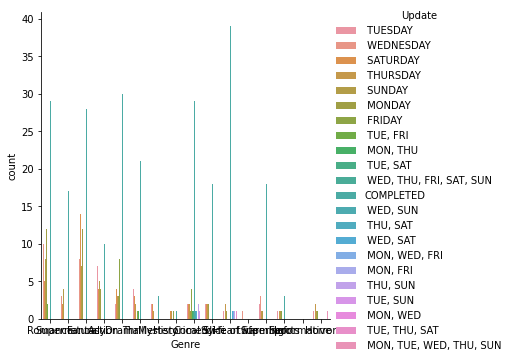

In [ ]:
sns.catplot( x = "Genre", hue = "Update",
            kind = "count", data = webtoon_df) # 장르별로 어떤 요일에 갱신되는 웹툰이 많은지 보기 위한 catplot

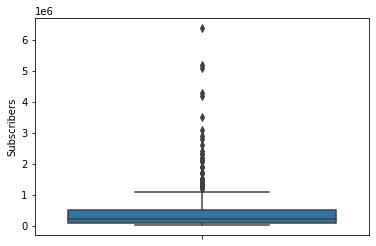

In [ ]:
sns.boxplot(y = webtoon_df['Subscribers'])   # 구독자수 중 다른 값에 비해 혼자 동떨어져 있는 값을 이상치로 보기 위한 boxplot

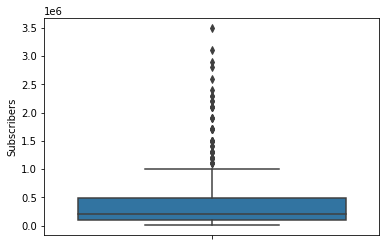

In [ ]:
webtoon_df.drop(webtoon_df[webtoon_df.Subscribers >= 4000000].index, # 400000000 이하 구독자 수 값만 가지고 계산
                inplace = True)
sns.boxplot(y = webtoon_df['Subscribers'])

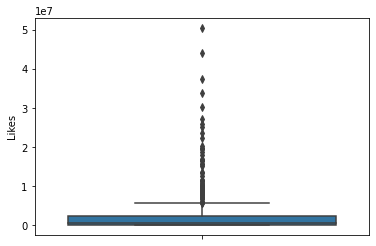

In [ ]:
sns.boxplot(y = webtoon_df['Likes'])  # 좋아요도 마찬가지 

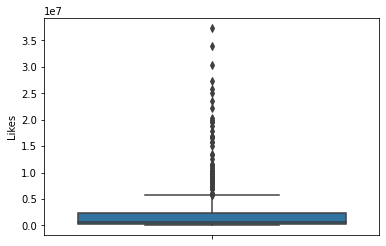

In [ ]:
webtoon_df.drop(webtoon_df[webtoon_df.Likes >= 40000000].index,
                inplace = True)
sns.boxplot(y = webtoon_df['Likes'])

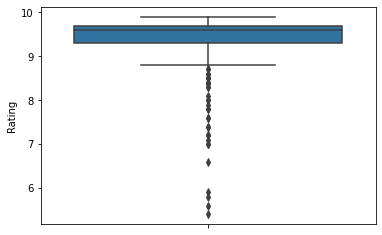

In [ ]:
sns.boxplot(y = webtoon_df['Rating'])

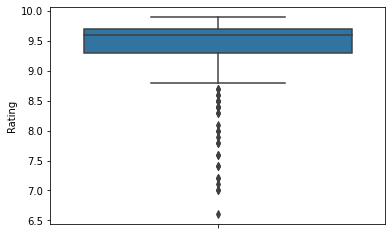

In [ ]:
webtoon_df.drop(webtoon_df[webtoon_df.Rating <= 6].index,
                inplace = True)
sns.boxplot(y = webtoon_df['Rating'])

In [ ]:
webtoon_df.describe()

,id,Rating,Subscribers,Likes
count,558.000000,558.000000,5.580000e+02,5.580000e+02
mean,284.711470,9.441039,3.838832e+05,2.479885e+06
std,164.211562,0.465526,4.823711e+05,4.718009e+06
min,2.000000,6.600000,3.100000e+03,2.434000e+03
25%,142.250000,9.300000,9.182500e+04,2.000000e+05
50%,283.500000,9.600000,2.060500e+05,6.898230e+05
75%,427.750000,9.700000,4.861750e+05,2.400000e+06
max,568.000000,9.900000,3.500000e+06,3.740000e+07


In [ ]:
from sklearn.preprocessing import MinMaxScaler   # charges columns nomalize
scaler = MinMaxScaler()
webtoon_df[['Likes']] = scaler.fit_transform(webtoon_df[['Likes']])
webtoon_df.describe()

,id,Rating,Subscribers,Likes
count,558.000000,558.000000,5.580000e+02,558.000000
mean,284.711470,9.441039,3.838832e+05,0.066246
std,164.211562,0.465526,4.823711e+05,0.126158
min,2.000000,6.600000,3.100000e+03,0.000000
25%,142.250000,9.300000,9.182500e+04,0.005283
50%,283.500000,9.600000,2.060500e+05,0.018381
75%,427.750000,9.700000,4.861750e+05,0.064110
max,568.000000,9.900000,3.500000e+06,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler   # charges columns nomalize
scaler = MinMaxScaler()
webtoon_df[['Subscribers']] = scaler.fit_transform(webtoon_df[['Subscribers']])
webtoon_df.describe()

,id,Rating,Subscribers,Likes
count,558.000000,558.000000,558.000000,558.000000
mean,284.711470,9.441039,0.108892,0.066246
std,164.211562,0.465526,0.137942,0.126158
min,2.000000,6.600000,0.000000,0.000000
25%,142.250000,9.300000,0.025372,0.005283
50%,283.500000,9.600000,0.058037,0.018381
75%,427.750000,9.700000,0.138144,0.064110
max,568.000000,9.900000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler   # charges columns nomalize
scaler = MinMaxScaler()
webtoon_df[['Rating']] = scaler.fit_transform(webtoon_df[['Rating']])
webtoon_df.describe()

,id,Rating,Subscribers,Likes
count,558.000000,558.000000,558.000000,558.000000
mean,284.711470,0.860921,0.108892,0.066246
std,164.211562,0.141069,0.137942,0.126158
min,2.000000,0.000000,0.000000,0.000000
25%,142.250000,0.818182,0.025372,0.005283
50%,283.500000,0.909091,0.058037,0.018381
75%,427.750000,0.939394,0.138144,0.064110
max,568.000000,1.000000,1.000000,1.000000


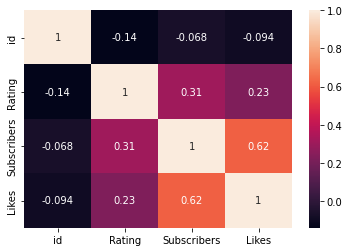

In [ ]:
sns.heatmap(webtoon_df.corr(), annot=True)

In [ ]:
df.head()

,id,Name,Writer,Genre,Rating,Update,Subscribers,Likes
473,473,Surviving Romance,Lee Yone,Horror,9.8,THURSDAY,484100,1600000
517,517,BRAIN Anthology,Various Artists,Horror,9.4,"MON, TUE, WED, THU, SUN",139100,755085
519,519,Everything is Fine,Mike Birchall,Horror,9.7,MONDAY,527700,1600000
524,524,Uriah,Toffuo,Horror,9.8,SATURDAY,39600,2100000
525,525,Tales of the Unusual,Sungdae Oh,Horror,9.6,SUNDAY,710500,7800000


In [ ]:
webtoon_df.head()

,id,Name,Writer,Genre,Rating,Update,Subscribers,Likes
2,2,Midnight Poppy Land,Lilydusk,Romance,0.969697,SATURDAY,0.599645,0.278028
3,3,Age Matters,Enjelicious,Romance,0.969697,WEDNESDAY,1.000000,0.692493
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,Supernatural,0.969697,THURSDAY,0.428065,0.264658
5,5,LUMINE,Emma Krogell,Fantasy,0.969697,SUNDAY,0.084904,0.505315
6,6,Jackson's Diary,Paola Batalla,Supernatural,0.939394,SUNDAY,0.017673,0.077480


#4 Data Analysis

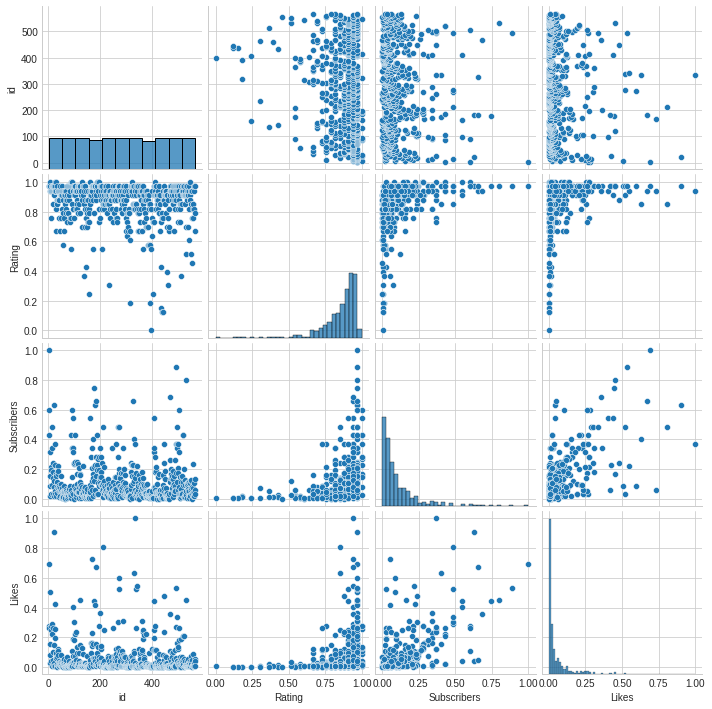

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20, 10)

sb.pairplot(webtoon_df)


In [ ]:
from sklearn.model_selection import train_test_split

X_var = webtoon_df[['Likes']]
y_var = webtoon_df['Subscribers']

X_train, X_test, y_train, y_test = train_test_split(
    X_var, y_var, test_size = 0.3, random_state = 0
)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [ ]:
from termcolor import colored as cl

print(cl('R-Squared :', attrs = ['bold']),
      lr.score(X_test, y_test))


R-Squared : 0.5127482051735464


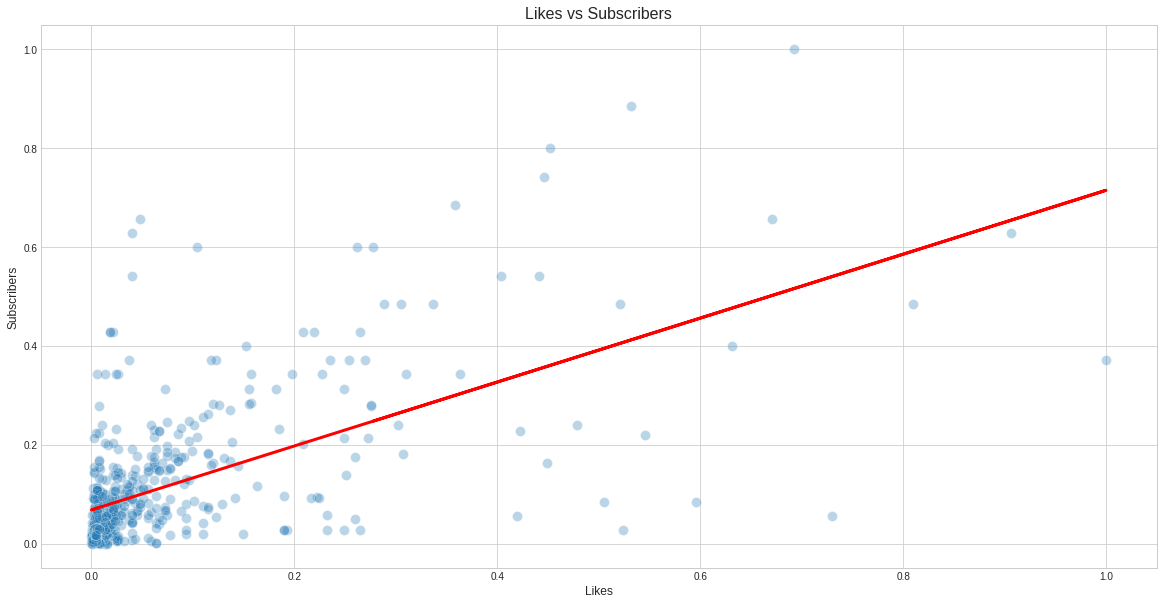

In [ ]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_
sb.scatterplot(x = 'Likes', y = 'Subscribers',
data = webtoon_df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.plot(webtoon_df['Likes'], slr_slope*webtoon_df['Likes'] + slr_intercept,
color = 'r', linewidth = 3)
plt.title('Likes vs Subscribers', fontsize = 16)
plt.ylabel('Subscribers', fontsize = 12)
plt.xlabel('Likes', fontsize = 12)
plt.savefig('Likes_Subscribers.png')

In [ ]:
X_var = webtoon_df[['Likes']]
y_var = webtoon_df['Subscribers']

X_train, X_test, y_train, y_test = train_test_split(
    X_var, y_var, test_size = 0.2, random_state = 0
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print(cl('R-Squared :', attrs = ['bold']),
      lr.score(X_test, y_test))

R-Squared : 0.5321254640235853


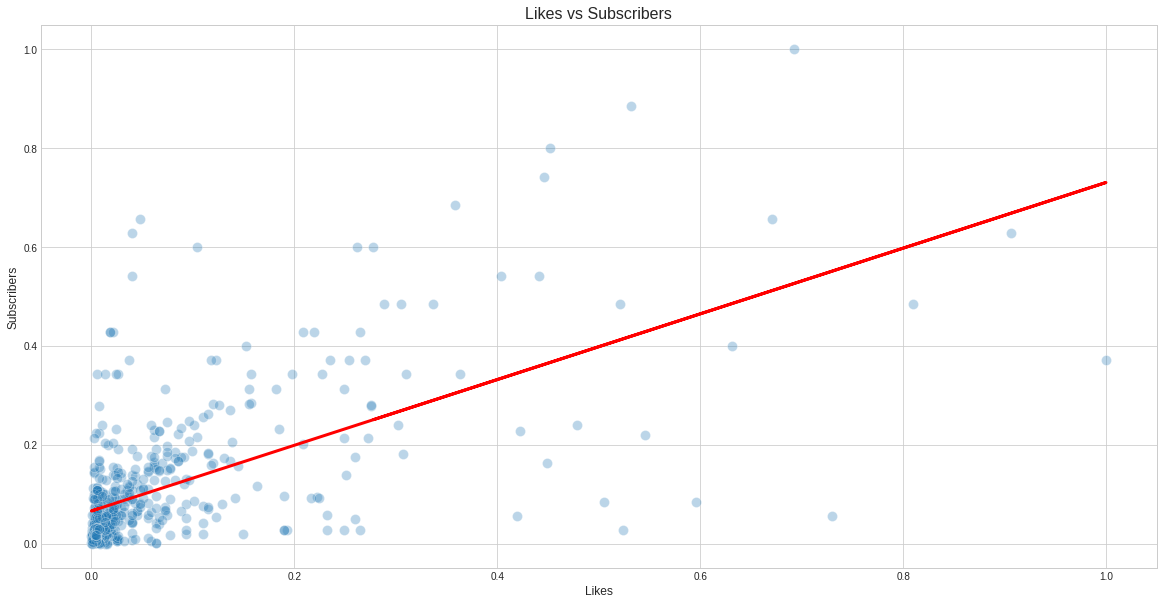

In [ ]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_
sb.scatterplot(x = 'Likes', y = 'Subscribers',
data = webtoon_df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.plot(webtoon_df['Likes'], slr_slope*webtoon_df['Likes'] + slr_intercept,
color = 'r', linewidth = 3)
plt.title('Likes vs Subscribers', fontsize = 16)
plt.ylabel('Subscribers', fontsize = 12)
plt.xlabel('Likes', fontsize = 12)
plt.savefig('Likes_Subscribers.png')